In [2]:
from keras.models import load_model
from utils.losses import *
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


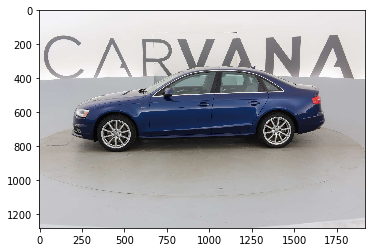

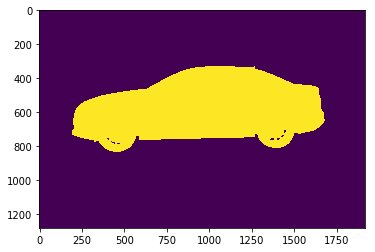

In [3]:
filename = '0cdf5b5d0ce1_05'

img = np.array(Image.open("inputs/train/original/{}.jpg".format(filename)))
label = np.array(Image.open("inputs/train_mask/original/{}_mask.gif".format(filename)))
plt.imshow(img)
plt.show()
plt.imshow(label)
plt.show()

img = img[np.newaxis, 0:1268, 0:1908, :]


(1268, 1908)


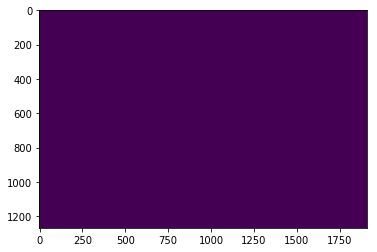

In [4]:
model = load_model('models/model_180212.hdf5', 
    custom_objects={'dice_with_l2_loss':dice_with_l2_loss, 'dice_coef':dice_coef})
    

label_result = model.predict(img)
label_result = np.squeeze(label_result)
# np.savetxt("hi.csv", label_result, delimiter=",")

print(label_result.shape)
plt.imshow(label_result)
plt.show()
